# Subject: Joining Data

## Jose Servin

### Data used: https://www.chicago.gov/city/en/depts/other/dataset/wards.html

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Importing data and DF definition

In [3]:
wards = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/Ward_Offices.csv')
wards = wards[['WARD', 'ALDERMAN', 'ADDRESS','ZIPCODE']].copy()
wards.columns = [x.lower() for x in wards.columns]
wards.head()


,ward,alderman,address,zipcode
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616


In [4]:
wards.dtypes

ward         int64
alderman    object
address     object
zipcode      int64
dtype: object

In [5]:
census = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/ward_population.csv')
census.head()

,ward,pop_2010,pop_2016,pct_change,address,zip_code
0,1,"56,149","56,661",1%,1958 North Milwaukee Avenue,60647
1,2,"55,805","57,705",3%,1400 North Ashland Avenue,60622
2,3,"53,039","55,763",5%,5046 South State Street,60609
3,4,"54,589","57,301",5%,435 East 35th Street,60616
4,5,"51,455","52,073",1%,2325 East 71st Street,60649


In [6]:
census.dtypes

ward           int64
pop_2010      object
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [7]:
census['ward'] = census['ward'].astype(int)


In [8]:
census.dtypes

ward           int64
pop_2010      object
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [9]:
census['pop_2010'] = census['pop_2010'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [10]:
census.dtypes

ward           int64
pop_2010       int64
pop_2016      object
pct_change    object
address       object
zip_code       int64
dtype: object

In [11]:
census['pop_2016'] = census['pop_2016'].apply(lambda x: int(x.split()[0].replace(',', '')))

In [12]:
census.dtypes

ward           int64
pop_2010       int64
pop_2016       int64
pct_change    object
address       object
zip_code       int64
dtype: object

In [13]:
census['pct_change'] = census['pct_change'].str.rstrip('%').astype('float') / 100.0


In [14]:
census.dtypes

ward            int64
pop_2010        int64
pop_2016        int64
pct_change    float64
address        object
zip_code        int64
dtype: object

In [15]:
census.head()

,ward,pop_2010,pop_2016,pct_change,address,zip_code
0,1,56149,56661,0.01,1958 North Milwaukee Avenue,60647
1,2,55805,57705,0.03,1400 North Ashland Avenue,60622
2,3,53039,55763,0.05,5046 South State Street,60609
3,4,54589,57301,0.05,435 East 35th Street,60616
4,5,51455,52073,0.01,2325 East 71st Street,60649


In [16]:
wards.dtypes

ward         int64
alderman    object
address     object
zipcode      int64
dtype: object

In [17]:
wards.head()

,ward,alderman,address,zipcode
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616


# Inner Join: only returns matching values in both tables

In [18]:
wards_census  = wards.merge(census, on='ward', suffixes=('_ward','_cens'))
wards_census.head()

,ward,alderman,address_ward,zipcode,pop_2010,pop_2016,pct_change,address_cens,zip_code
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618,55598,56121,0.01,3001 West Irving Park Road,60618
1,17,"Moore, David H.",1344 West 79th Street,60636,51846,49271,-0.05,1344 West 79th Street,60636
2,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657,56058,59871,0.07,"3223 North Sheffield Avenue, Suite A",60657
3,37,"Mitts, Emma",5344 West North Avenue,60651,51538,51178,-0.01,5344 West North Avenue,60651
4,4,"King, Sophia D.",435 East 35th Street,60616,54589,57301,0.05,435 East 35th Street,60616


In [19]:
wards_census.shape

(50, 9)

In [20]:
# value_counts() of zipcodes in wards_census DF
wards_census['zipcode'].value_counts()

60618    3
60609    3
60628    2
60639    2
60636    2
60608    2
60622    2
60612    2
60630    2
60659    2
60614    2
60640    2
60617    2
60619    2
60643    1
60626    1
60647    1
60629    1
60621    1
60649    1
60634    1
60631    1
60632    1
60623    1
60652    1
60607    1
60602    1
60624    1
60620    1
60641    1
60616    1
60651    1
60657    1
60638    1
Name: zipcode, dtype: int64

# One-to-Many Relationships

In [21]:
# Import Buiness_Licenses csv containing active businesses in each ward
wards_businesses = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/Business_Licenses.csv')
wards_businesses.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'BUSINESS ACTIVITY ID', 'BUSINESS ACTIVITY',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS', 'LICENSE STATUS CHANGE DATE', 'SSA',
       'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')

In [22]:
wards_businesses = wards_businesses[['ACCOUNT NUMBER','WARD','LICENSE NUMBER','LEGAL NAME','ADDRESS','ZIP CODE']]

In [23]:
wards_businesses.columns = [x.lower() for x in wards_businesses.columns]
wards_businesses.head()

,account number,ward,license number,legal name,address,zip code
0,406944,42.0,2818099,"GERMAN AMERICAN EVENTS, LLC",150 N MICHIGAN AVE 35TH,60601
1,337918,42.0,2818166,THE NOBLE GRAPE CORPORATION,50 W WASHINGTON ST,60602
2,385905,44.0,2822280,Patrick Markham,3252 N BROADWAY,60657
3,385905,47.0,2822276,Patrick Markham,4560 N LINCOLN AVE,60625
4,385905,1.0,2822277,Patrick Markham,2439 W FULLERTON AVE,60647


In [24]:
wards_businesses.isna().sum()

account number     0
ward              32
license number     0
legal name         0
address            0
zip code           0
dtype: int64

In [25]:
wards_businesses = wards_businesses[wards_businesses['ward'].notna()]

In [26]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [27]:
wards_businesses = wards_businesses[wards_businesses['license number'].notna()]

In [28]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [29]:
wards_businesses = wards_businesses[wards_businesses['zip code'].notna()]

In [30]:
wards_businesses.isna().sum()

account number    0
ward              0
license number    0
legal name        0
address           0
zip code          0
dtype: int64

In [31]:
wards_businesses['ward'] = wards_businesses['ward'].astype(int)

In [32]:
wards_businesses['zip code'] = wards_businesses['zip code'].astype(int)

In [33]:
wards_businesses.dtypes

account number     int64
ward               int64
license number     int64
legal name        object
address           object
zip code           int64
dtype: object

In [34]:
wards_businesses.shape

(267, 6)

In [35]:
wards_businesses_merge = wards.merge(wards_businesses, on='ward', suffixes=('_wards','_buissiness'))

In [36]:
wards_businesses_merge.sort_values('ward')

,ward,alderman,address_wards,zipcode,account number,license number,legal name,address_buissiness,zip code
150,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,385905,2822277,Patrick Markham,2439 W FULLERTON AVE,60647
151,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,477200,2802928,CHICAGO MAKERS POP UP LLC,1821 W CHICAGO AVE,60622
152,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,203814,2812570,"CHIPP INN, INC.",832 N GREENVIEW AVE SIDEWALK,60642
153,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,15848,2812560,"FIGUEROA BAR, INC.",1958 W HURON ST,60622
154,1,"La Spata, Daniel",1958 North Milwaukee Avenue,60647,377484,2797224,YUM DUM INC.,1420 N WOOD ST,60622
...,...,...,...,...,...,...,...,...,...
19,48,"Osterman, Harry",5533 North Broadway,60640,3649,2802977,BROADWAY JOE'S INC,6036 N BROADWAY,60660
165,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,299612,2803847,"LAPDOG, INC.",1508 W JARVIS AVE,60626
164,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,36746,2803812,"STINDLE, INC.",1500-1524 W JARVIS AVE,60626
166,49,"Hadden, Maria E.",1447 West Morse Avenue,60626,313311,2803844,"FLANGELATO, LLC",1500-1524 W JARVIS AVE,60626


In [37]:
wards_businesses.to_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/ward_businesses.csv', index=False)

# Mergin Multiple DataFrames

In [38]:
# Introduce business_grants DataFrame
business_grants = pd.read_csv('/Users/joseservin/DataCamp/Courses/Joining_Data/business_grants.csv')
business_grants.columns

Index(['address', 'zip code', 'INCENTIVE AMOUNT', 'grant', 'company'], dtype='object')

In [39]:
business_grants = business_grants[['address','zip code','grant','company']]

In [40]:
wards_businesses.columns

Index(['account number', 'ward', 'license number', 'legal name', 'address',
       'zip code'],
      dtype='object')

In [41]:
wards.columns

Index(['ward', 'alderman', 'address', 'zipcode'], dtype='object')

In [42]:
business_grants.merge(wards_businesses, on=['address','zip code'])

,address,zip code,grant,company,account number,ward,license number,legal name
0,150 N MICHIGAN AVE 35TH,60601,150000.00,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818099,"GERMAN AMERICAN EVENTS, LLC"
1,150 N MICHIGAN AVE 35TH,60601,150000.00,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818216,"GERMAN AMERICAN EVENTS, LLC"
2,150 N MICHIGAN AVE 35TH,60601,117072.04,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818099,"GERMAN AMERICAN EVENTS, LLC"
3,150 N MICHIGAN AVE 35TH,60601,117072.04,"GERMAN AMERICAN EVENTS, LLC",406944,42,2818216,"GERMAN AMERICAN EVENTS, LLC"
4,50 W WASHINGTON ST,60602,150000.00,THE NOBLE GRAPE CORPORATION,337918,42,2818166,THE NOBLE GRAPE CORPORATION
...,...,...,...,...,...,...,...,...
276,6150 S NEENAH AVE 1 1,60638,19500.00,STANISLAW ZALINSKI,306119,13,2207151,STANISLAW ZALINSKI
277,4912 S CICERO AVE 1ST,60638,50000.00,ALI M AGEL & GERMAN ARGUETA,26906,22,2213934,ALI M AGEL & GERMAN ARGUETA
278,7634 S BISHOP ST,60620,50000.00,Southside Clothing LLC,463965,17,2698815,Southside Clothing LLC
279,9150 S PAXTON AVE,60617,100000.00,JAMES R. KING,403109,7,2442462,JAMES R. KING


In [43]:
grants_licenses_ward = business_grants.merge(wards_businesses, on=['address','zip code']) \
    .merge(wards, on='ward', suffixes = ('_bus','_ward'))

In [44]:
grants_licenses_ward.shape

(281, 11)

In [45]:
grants_licenses_ward.dtypes

address_bus        object
zip code            int64
grant             float64
company            object
account number      int64
ward                int64
license number      int64
legal name         object
alderman           object
address_ward       object
zipcode             int64
dtype: object

# Final Data Cleaning needed for plot

In [46]:
grants_licenses_ward['zip code'] = grants_licenses_ward['zip code'].astype(object)

In [47]:
grants_licenses_ward['account number'] = grants_licenses_ward['account number'].astype(object)

In [48]:
grants_licenses_ward['zipcode'] = grants_licenses_ward['zipcode'].astype(object)

In [49]:
grants_licenses_ward['license number'] = grants_licenses_ward['license number'].astype(object)

<AxesSubplot:xlabel='ward'>

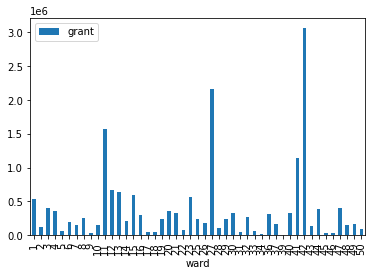

In [50]:
grants_licenses_ward.groupby('ward').agg('sum').plot(kind='bar')

#### 
df1.merge(df2, on'col') \ 
    .merge(df3, on'col')

# Left Join

In [55]:
wards_businesses.columns

Index(['account number', 'ward', 'license number', 'legal name', 'address',
       'zip code'],
      dtype='object')

In [59]:
wards.columns

Index(['ward', 'alderman', 'address', 'zipcode'], dtype='object')

In [62]:
left_merge_df = wards.merge(wards_businesses, on='ward', how='left')
left_merge_df

,ward,alderman,address_x,zipcode,account number,license number,legal name,address_y,zip code
0,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618,454772.0,2636960.0,"ALBANY PARK SMOKE SHOP, INC.",4643 N KEDZIE AVE 1ST,60625.0
1,33,"Rodriguez Sanchez, Rossana",3001 West Irving Park Road,60618,421907.0,2560268.0,4225 GIDDINGS INC,4225 N KEDZIE AVE 1,60618.0
2,17,"Moore, David H.",1344 West 79th Street,60636,463965.0,2698815.0,Southside Clothing LLC,7634 S BISHOP ST,60620.0
3,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657,385905.0,2822280.0,Patrick Markham,3252 N BROADWAY,60657.0
4,44,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657,345964.0,2797838.0,"DS CANTINA, INC.",3350 N HALSTED ST,60657.0
...,...,...,...,...,...,...,...,...,...
265,25,"Sigcho-Lopez, Byron",1645 South Blue Island Avenue,60608,49826.0,2812562.0,AMERICA BUSINESS COLLEGE INC.,2530 S ARTESIAN AVE,60608.0
266,25,"Sigcho-Lopez, Byron",1645 South Blue Island Avenue,60608,314119.0,1801089.0,"F & B FOOD MART, LLC",2403 S BLUE ISLAND AVE,60608.0
267,25,"Sigcho-Lopez, Byron",1645 South Blue Island Avenue,60608,357932.0,2073814.0,"BLUE ISLAND ENTERPRISES, INC.",2578-2584 S BLUE ISLAND AVE 1,60608.0
268,25,"Sigcho-Lopez, Byron",1645 South Blue Island Avenue,60608,367395.0,2192808.0,LUXOTTICA OF AMERICA INC.,1101 W JACKSON BLVD 1,60607.0


In [65]:
left_merge_df_2 = wards_businesses.merge(wards, on='ward', how='left')
left_merge_df_2

,account number,ward,license number,legal name,address_x,zip code,alderman,address_y,zipcode
0,406944,42,2818099,"GERMAN AMERICAN EVENTS, LLC",150 N MICHIGAN AVE 35TH,60601,"Reilly, Brendan",121 N LaSalle St,60602
1,337918,42,2818166,THE NOBLE GRAPE CORPORATION,50 W WASHINGTON ST,60602,"Reilly, Brendan",121 N LaSalle St,60602
2,385905,44,2822280,Patrick Markham,3252 N BROADWAY,60657,"Tunney, Thomas","3223 North Sheffield Avenue, Suite A",60657
3,385905,47,2822276,Patrick Markham,4560 N LINCOLN AVE,60625,"Martin, Matthew J.",4243 North Lincoln Avenue,60618
4,385905,1,2822277,Patrick Markham,2439 W FULLERTON AVE,60647,"La Spata, Daniel",1958 North Milwaukee Avenue,60647
...,...,...,...,...,...,...,...,...,...
262,306119,13,2207151,STANISLAW ZALINSKI,6150 S NEENAH AVE 1 1,60638,"Quinn, Marty",6500 South Pulaski Road,60629
263,26906,22,2213934,ALI M AGEL & GERMAN ARGUETA,4912 S CICERO AVE 1ST,60638,"Rodriguez, Michael D.",2500 South St. Louis Avenue,60623
264,463965,17,2698815,Southside Clothing LLC,7634 S BISHOP ST,60620,"Moore, David H.",1344 West 79th Street,60636
265,403109,7,2442462,JAMES R. KING,9150 S PAXTON AVE,60617,"Mitchell, Gregory I.",2249 East 95th Street,60617
